# Ejercicio 1

## Ejercicio 1.1

**1) Según las siguientes funciones de densidad de probabilidad y acumulada de la distribución teórica (de un ajuste) superpuesta a la de los datos que se disponían. ¿Es un buen ajuste? ¿Qué distribución siguen los datos?**

![](IMGEN2.png)

A traves del gráfico de desnsidad de probabilidad observamos como el modelo parece captar correctamente la tendencia de los datos, sin embargo apreciamos como sobretodo al principio y a lo largo de la mayoria de muestras que hay algunas diferencias notables entre los valores teoricos y los empíricos. 

En cambio, en el caso de la funcion de densidad acumulada observamos como el modelo parece seguir bastante bien la progresión de los puntos empíricos con desviaciones entre los puntos y la línea teórica que parecen ser pequeñas indicando que la distribución teórica podría ser una buena representación de la distribución acumulativa de los datos.

En general, parece que el ajuste es razonablemente bueno, especialmente al mirar el segundo gráfico aunque haría falta más información para dar una respuesta definitiva.

Es dificil saber a que distribucion pertenecen los datos solo con esto, pero parecen seguir algo parecido una distribucion de Poisson debido a la concentración de la probabilidad en valores bajos sin valores con una frecuencia alta, pero podria ser una poisson como muchas otras ya que antes de nada también tendriamos que ver si los valores son discretos o continuos, ya que una poisson es una función únicamente discreta.

**2) Visualizando el siguiente test chi-cuadrado, ¿dirías que el modelo describe correctamente los datos? ¿Cual es el valor crítico de $\chi^2_{0.05, 27}$? ¿En base a este valor, qué puedes decir del test realizado?**

![](IMGEN3.png)

Tomando un nivel de significancia del 0.05 y 27 grados de libertad, según la tabla de valores críticos de chi cuadrado, el valor critico es de 40.11. Por lo que con un valor mcuho mayor, de mas de 10000, rechazamos la hipótesis nula de que los datos siguen la distribución teórica propuesta. Esto indica que el modelo teórico no describe adecuadamente los datos, cosa que reiteramos con el p-valor que es muy inferior a 0.05. 

## Ejercicio 1.2

**3) Dados los siguientes vectores de coordenadas, realiza su gráfico. ¿A qué famosa función se parece?**

In [ ]:
x = c(3.500462, 5.516202, -5.817098, 6.242510, -6.652981, 1.697752, -8.594311, 7.793405, -7.982129, 6.407409, -5.419236, 6.479960, -0.652670, -2.275969, -9.381950, -1.728702, 5.096113, -4.100366, -1.020425, -5.748364, 3.796729, -2.298468, -4.764408, 3.465161, 2.1704554, 7.0421263)
y = c(33.558095, 62.718484, 29.187768, 79.197055, 32.918064, 8.010602, 64.414842, 110.766581, 56.199490, 80.0054646, 26.039630, 81.940358, 0.556445, -3.616270, 88.356788, -1.734453, 60.382887, 3.643277, -10.405096, 21.831002, 39.184803, 7.328277, 12.280009, 33.291483, 16.636935, 98.64467)

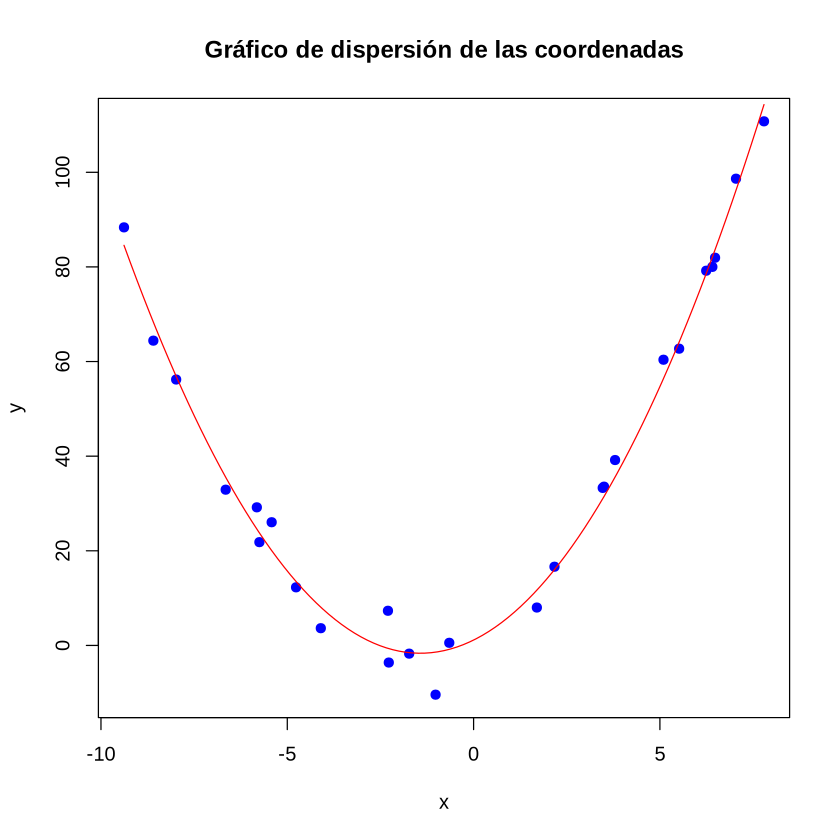

In [2]:
x <- c(3.500462, 5.516202, -5.817098, 6.242510, -6.652981, 1.697752, -8.594311,
       7.793405, -7.982129, 6.407409, -5.419236, 6.479960, -0.652670, -2.275969,
       -9.381950, -1.728702, 5.096113, -4.100366, -1.020425, -5.748364, 3.796729,
       -2.298468, -4.764408, 3.465161, 2.1704554, 7.0421263)

y <- c(33.558095, 62.718484, 29.187768, 79.197055, 32.918064, 8.010602, 64.414842,
       110.766581, 56.199490, 80.0054646, 26.039630, 81.940358, 0.556445, -3.616270,
       88.356788, -1.734453, 60.382887, 3.643277, -10.405096, 21.831002, 39.184803,
       7.328277, 12.280009, 33.291483, 16.636935, 98.64467)

# Creamos el gráfico de dispersión
plot(x, y, main="Gráfico de dispersión de las coordenadas",
     xlab="x", ylab="y", pch=19, col="blue")

# Si se desea agregar una línea de mejor ajuste cuadrático, podríamos hacerlo así:
fit <- lm(y ~ poly(x, 2, raw=TRUE))
curve(predict(fit, newdata=data.frame(x=x)), add=TRUE, col="red")

Viendo este gráfico esta bastante claro que los valores siguen una función cuadrática, que observando la forma de la parábola parece ser positiva.

**4) Utiliza el método de mínimos cuadrados visto en clase para ajustar una función a los datos presentados anteriormente. Según los resulados, ¿es un buen ajuste? Realiza los gráficos que creas necesarios para evaluar el modelo.**

Para este ajuste voy a usar la función cuadrática mencionada anteriormente de forma y = ax^2 + bx + c. Donde pondre un valor inicial a los parámetros de a = 10, b = 1 y c = 1.

In [9]:
m <- nls(y ~ a * x^2 + b * x + c, start=list(a=10, b=1, c=1))
summary(m)


Formula: y ~ a * x^2 + b * x + c

Parameters:
  Estimate Std. Error t value Pr(>|t|)    
a  1.36317    0.03347  40.723   <2e-16 ***
b  3.89726    0.14672  26.562   <2e-16 ***
c  1.13697    1.23348   0.922    0.366    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.922 on 23 degrees of freedom

Number of iterations to convergence: 1 
Achieved convergence tolerance: 6.023e-07


In [10]:
cor(y,predict(m))

[1] 0.9942242

A juzgar por el valor de la correlacion entre la función y los datos parece que esta se ajusta prácticamente a la perfección.

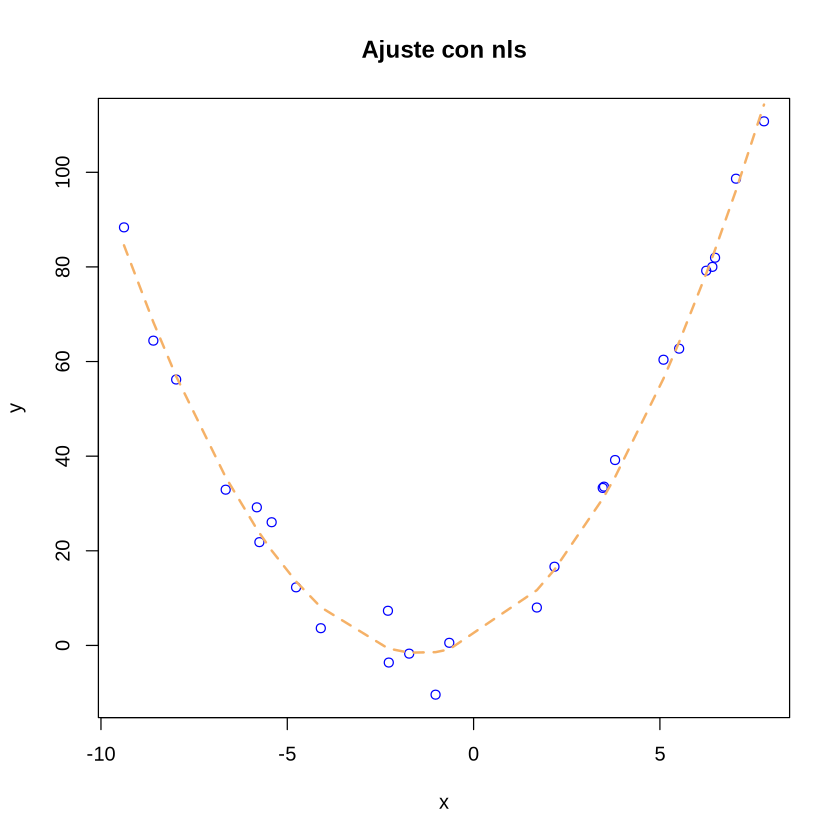

In [20]:
datos_ordenados <- data.frame(x, y)[order(x),]

plot(datos_ordenados$x, datos_ordenados$y, type = "p", col = "blue", main = "Ajuste con nls", xlab = "x", ylab = "y")

predicciones <- predict(m, list(x = datos_ordenados$x))

lines(datos_ordenados$x, predicciones, lty = 2, col = "#F5B167", lwd = 2)

El gráfico corrobora lo ya visto con la correlacion y es que esta función se adapta realmente bien a los datos.

A continuación calculo los residuales (diferencia entre curva ajustada y puntos, normalizado al error).

In [18]:
res = resid(m)/sigma(m)

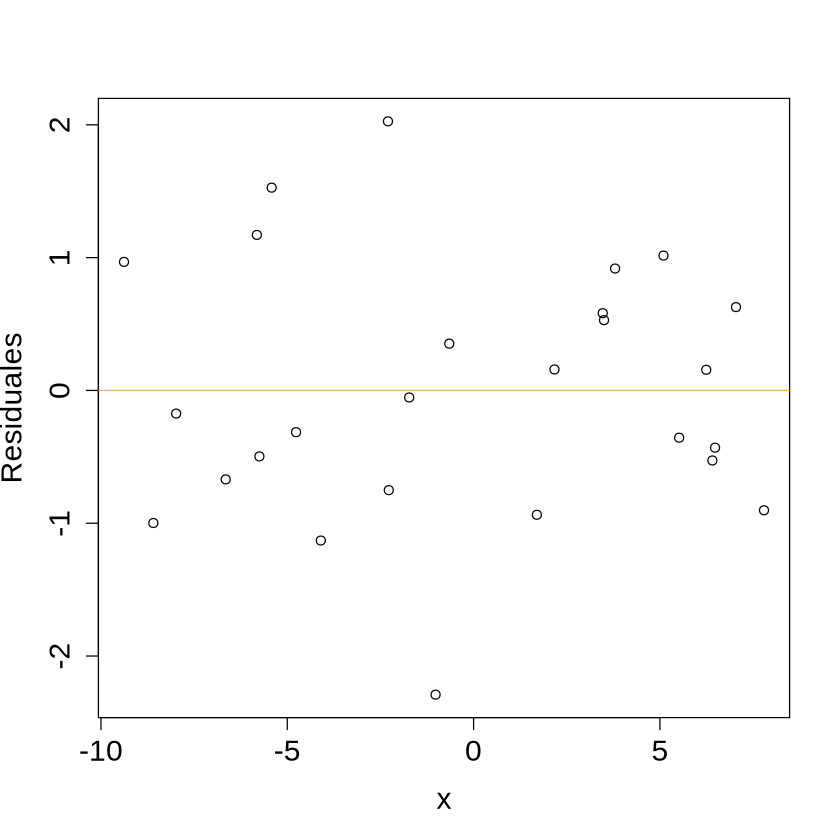

In [19]:
plot(x, res, ylab="Residuales", xlab="x", cex.lab=1.5, cex.axis=1.5) 
abline(0, 0, col="#F5B167") 

Como vemos, los valores están entre -2 y 2, por lo que se considera un buen ajuste en todo el rango de x.

In [ ]:
En conclusion, esta función se ajusta realmente bien a los datos por lo que es 